# Crime Analytics : Visualization of Incident Reports

### Analysis Summary:
     This Analysis Notebook will provide the crime incident analysis for Seattle and Sanfrancisco for the months June to September 2014. Below are the key obeservations from the analyis: (supported by the R-Visualization/scripts below)
     1. Crime rate is higher in Seattle when compared to SFO
     2. Lattitude info demonstrates that there are more crimes around the city centre than the other areas.
     3. Seattle is prone to vehicle theft incidents.
     4. SanFrancisco crime rates more pronounced in city center and strangely at peak in afternoon time.

### Data Acquisition :

     Following is the R code used to read the csv data and store them in appropriate fields for the analysis (1) above: 
     

In [ ]:
library("ggplot2")

sfo1 <- read.csv("sanfrancisco_incidents_summer_2014.csv", header = TRUE, stringsAsFactors = FALSE)
stl1 <- read.csv("seattle_incidents_summer_2014.csv", header = TRUE, na.strings = "", stringsAsFactors = FALSE)

sfodata <- sfo1[,c("Category", "Date", "Time")]
names(sfodata) <- c("Category", "DateTS", "Time")
sfodata$Category <- as.character(sfodata$Category)
sfodata$DateTS <- as.character(sfodata$DateTS)
sfodata$Time <- as.character(sfodata$Time)

sfodata$DateTS <- paste(sfodata$DateTS,sfodata$Time)
sfodata$DateTS <- as.POSIXct(sfodata$DateTS, tz="US/Pacific", format = "%m/%d/%Y %H:%M")
sfodata$Date <- as.Date(as.POSIXct(sfodata$DateTS, tz="US/Pacific"), tz="US/Pacific")
sfodata$Year <- as.integer(format(sfodata$DateTS, "%Y"))
sfodata$Month <- as.integer(format(sfodata$DateTS, "%m"))
sfodata <- sfodata[,c("Category", "DateTS", "Year", "Month", "Date")]
sfodata$City <- "San Francisco"

seadata <- stl1[,c("Summarized.Offense.Description", "Occurred.Date.or.Date.Range.Start", "Year", "Month")]
names(seadata) <- c("Category", "DateTS", "Year", "Month")

seadata$Category <- as.character(seadata$Category)
seadata$DateTS <- as.character(seadata$DateTS)
seadata$DateTS <- as.POSIXct(seadata$DateTS, tz="US/Pacific", format = "%m/%d/%Y %H:%M:%S %p")
seadata$Date <- as.Date(as.POSIXct(seadata$DateTS, tz="US/Pacific"), tz="US/Pacific")
seadata <- seadata[,c("Category", "DateTS", "Year", "Month", "Date")]
seadata$City <- "Seattle"
summary(sfodata)
summary(seadata)

### Data Preparation :

     Below is the R code used to collate the data to compare the crime rates between SFO and Seattle :

In [2]:
twocities <- rbind(sfodata, seadata)
summary(twocities)

crimeFreq <- as.data.frame(table(twocities$Date, twocities$City))
colnames(crimeFreq) <- c("Date", "City", "Freq")
crimeFreq$Date <- as.Date(crimeFreq$Date)
str(crimeFreq)

   Category             DateTS                         Year     
 Length:61772       Min.   :2014-06-01 00:01:00   Min.   :2014  
 Class :character   1st Qu.:2014-06-24 09:26:00   1st Qu.:2014  
 Mode  :character   Median :2014-07-17 10:00:00   Median :2014  
                    Mean   :2014-07-16 23:45:09   Mean   :2014  
                    3rd Qu.:2014-08-08 18:31:15   3rd Qu.:2014  
                    Max.   :2014-08-31 23:50:00   Max.   :2014  
     Month            Date                City          
 Min.   :6.000   Min.   :2014-06-01   Length:61772      
 1st Qu.:6.000   1st Qu.:2014-06-24   Class :character  
 Median :7.000   Median :2014-07-17   Mode  :character  
 Mean   :7.008   Mean   :2014-07-16                     
 3rd Qu.:8.000   3rd Qu.:2014-08-08                     
 Max.   :8.000   Max.   :2014-08-31                     

'data.frame':	184 obs. of  3 variables:
 $ Date: Date, format: "2014-06-01" "2014-06-02" ...
 $ City: Factor w/ 2 levels "San Francisco",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  284 296 294 380 319 324 293 247 271 289 ...


### Visualization :


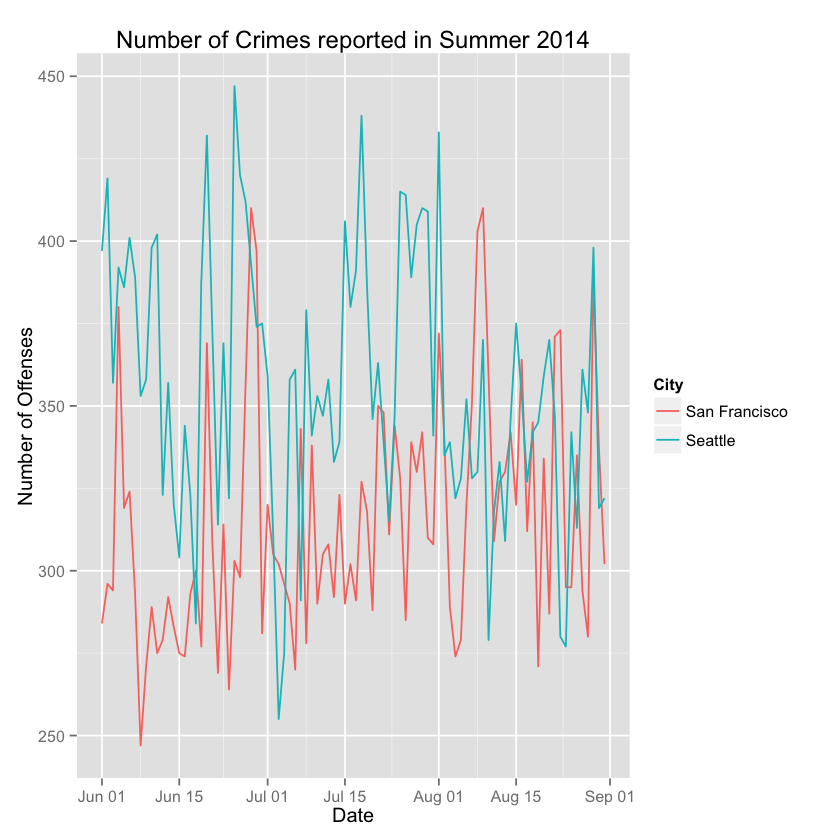

In [3]:
plot1 <- ggplot(data = crimeFreq, aes(x=Date, y = Freq, color = City)) + geom_line()
plot1 <- plot1 + xlab("Date") + ylab("Number of Offenses") + ggtitle("Number of Crimes reported in Summer 2014")
plot1

### Crime rates more pronounced in city center : 
    Crime data analysis based on location points out that there are more crimes around the city centre than the other areas. In the below chart we can clearly see that there is a spike at latitude specific to city centre area :￼￼

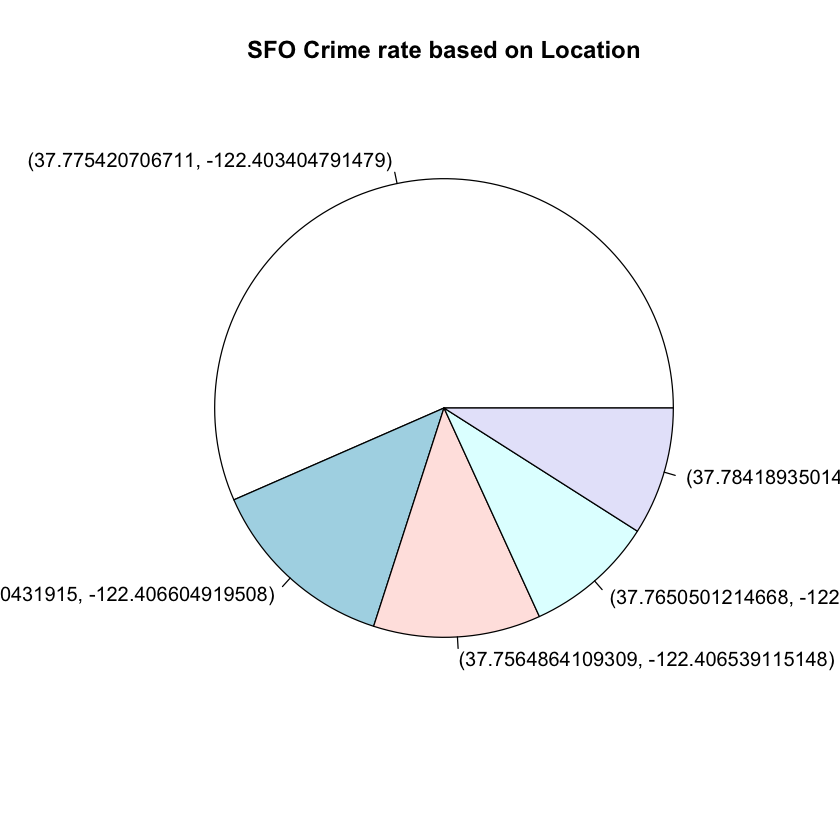

In [6]:
loccount <- table(sfo1$Location)
locbar <- sort(loccount,decreasing = TRUE)[1:5]
pie(locbar, main="SFO Crime rate based on Location")

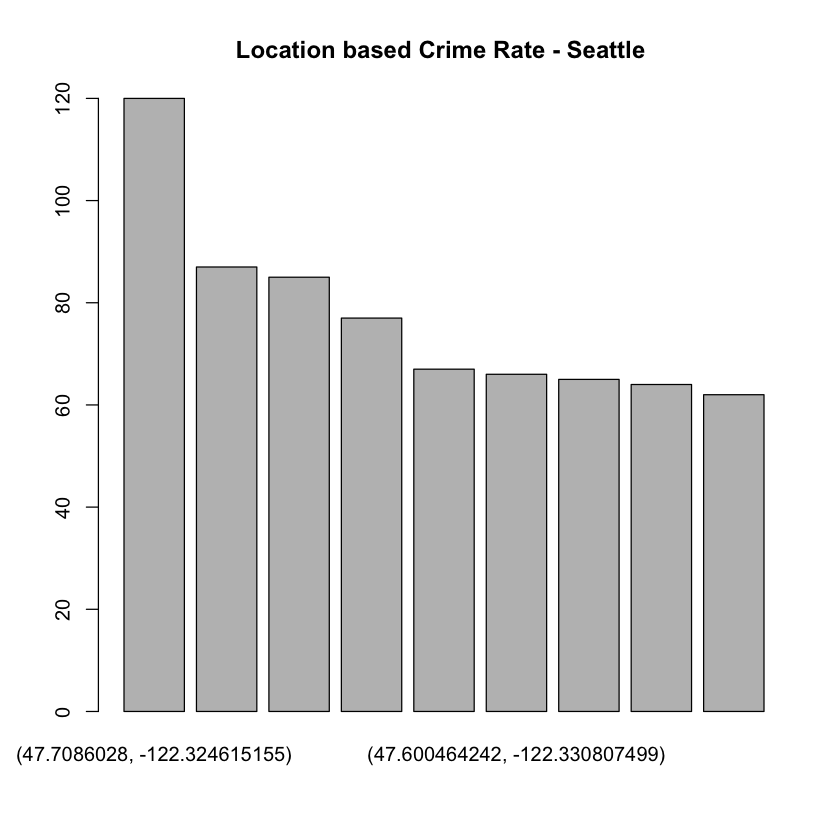

In [7]:
stlloccount <- table(stl1$Location) 
stlloccount <- sort(stlloccount,decreasing = TRUE)[2:10]
barplot(stlloccount, main = "Location based Crime Rate - Seattle ")

### Seattle is Prone to Vehicle Theft Incidents :

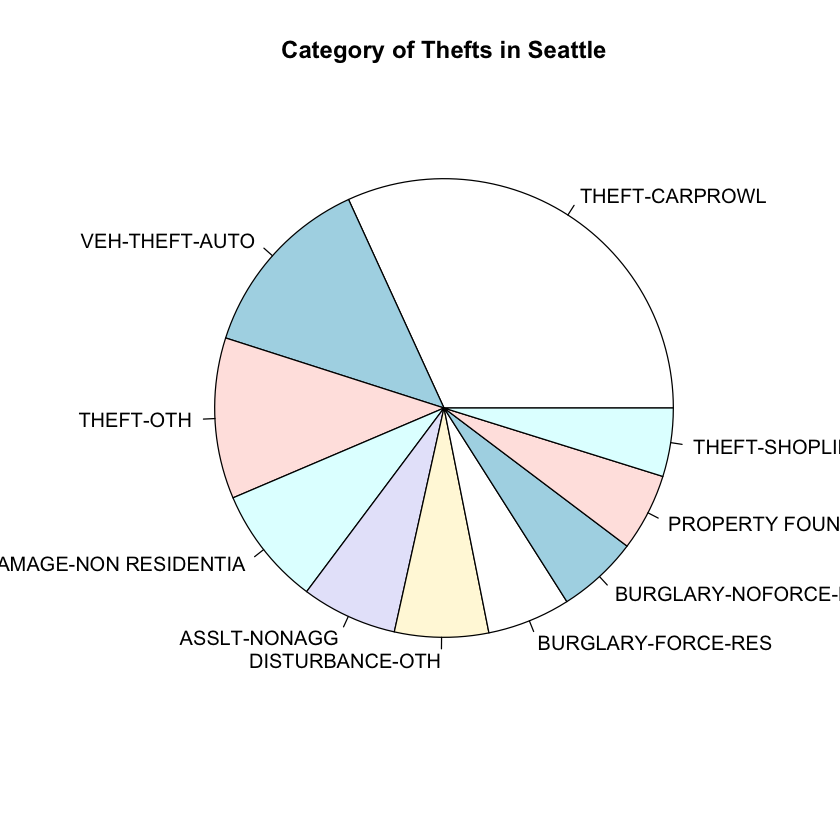

In [8]:
stltype <- table(stl1$Offense.Type)
stltype <- sort(stltype,decreasing=TRUE)[1:10]
pie(stltype, main = "Category of Thefts in Seattle")

### SanFrancisco crime rates strangely peak at afternoon time

       Sanfrancisco crime data over the period of June - september 2014, demonstrates that crime rates strangely peak at mid afternoon and remains high till midnight, and then declines during the morning time. This data is visualised in the below plots :
<img src="timePlot.jpg">